In [39]:
import logging

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import pandas as pd

In [2]:
from metrics.metrics import accuracy
from svm.kernerls import Linear, RBF
from svm.svm import SVM

logging.basicConfig(level=logging.DEBUG)

In [19]:
# Generate a random binary classification problem.
#X, y = make_classification(
#    n_samples=1000, n_features=10, n_informative=5, random_state=1111, n_classes=2, class_sep=1.75
#)

# Convert y to {-1, 1}
#y = (y * 2) - 1
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)





In [46]:
from sklearn.datasets import fetch_openml

dataset1 = fetch_openml(data_id=40536)

X = dataset1.data
y = dataset1.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [55]:
#print(dataset1)
feature_names = X.columns
id = 0
for feature in feature_names:
    print(str(id) + " :: " + feature + " " + str(X[feature].dtype))
    id = id + 1


0 :: has_null category
1 :: wave int64
2 :: gender category
3 :: age float64
4 :: age_o float64
5 :: d_age int64
6 :: d_d_age category
7 :: race category
8 :: race_o category
9 :: samerace category
10 :: importance_same_race float64
11 :: importance_same_religion float64
12 :: d_importance_same_race category
13 :: d_importance_same_religion category
14 :: field category
15 :: pref_o_attractive float64
16 :: pref_o_sincere float64
17 :: pref_o_intelligence float64
18 :: pref_o_funny float64
19 :: pref_o_ambitious float64
20 :: pref_o_shared_interests float64
21 :: d_pref_o_attractive category
22 :: d_pref_o_sincere category
23 :: d_pref_o_intelligence category
24 :: d_pref_o_funny category
25 :: d_pref_o_ambitious category
26 :: d_pref_o_shared_interests category
27 :: attractive_o float64
28 :: sinsere_o float64
29 :: intelligence_o float64
30 :: funny_o float64
31 :: ambitous_o float64
32 :: shared_interests_o float64
33 :: d_attractive_o category
34 :: d_sinsere_o category
35 :: d_in

In [61]:
print(len(X))
print(y)


8378
0       0
1       0
2       1
3       1
4       1
       ..
8373    0
8374    0
8375    0
8376    0
8377    0
Name: match, Length: 8378, dtype: category
Categories (2, object): ['0', '1']


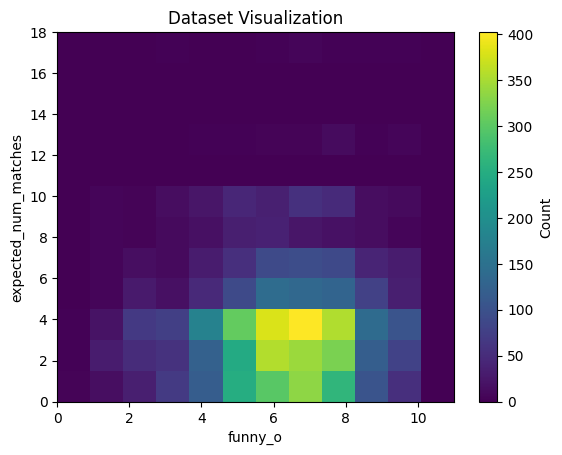

In [90]:
import matplotlib.pyplot as plt

logging.getLogger('matplotlib').setLevel(logging.WARNING)

def draw_data(X, y, xn, xy):
    # Convert y to numeric values if it's not already
    y = pd.to_numeric(y, errors='coerce')
    X = X.dropna(subset=[X.columns[xn], X.columns[xy]])

    # Create a 2D histogram
    plt.hist2d(X.iloc[:, xn], X.iloc[:, xy], bins=12, cmap='viridis')
    plt.title('Dataset Visualization')
    plt.xlabel(X.columns[xn])
    plt.ylabel(X.columns[xy])
    plt.colorbar(label='Count')
    plt.show()

draw_data(X, y, 30, 111)

In [7]:
model = SVM(max_iter=300, kernel=RBF(), C=0.6)
def classification():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Classification accuracy (RBF): %s" % ( accuracy(y_test, predictions)))

    # Test all the kernels (uncomment the code below)
    #for kernel in [RBF(gamma=0.1), Linear()]:
    #    model = SVM(max_iter=500, kernel=kernel, C=0.6)
    #    model.fit(X_train, y_train)
    #    predictions = model.predict(X_test)
    #    print("Classification accuracy (%s): %s" % (kernel, accuracy(y_test, predictions)))

In [8]:
classification()

INFO:root:Convergence has reached after 143.


Classification accuracy (RBF): 0.97


In [13]:
import numpy as np

def train_plot(X, y, model, feature_index1, feature_index2):
    # Create a mesh grid for our plot
    h = .02  # step size in the mesh
    x_min, x_max = X[:, feature_index1].min() - 1, X[:, feature_index1].max() + 1
    y_min, y_max = X[:, feature_index2].min() - 1, X[:, feature_index2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Prepare grid for prediction by adding original features
    grid = np.c_[xx.ravel(), yy.ravel()]
    for i in range(X.shape[1]):
        if i not in [feature_index1, feature_index2]:
            grid = np.c_[grid, np.full(grid.shape[0], X[:, i].mean())]

    # Use the model to predict the output for each point on the grid
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Plot the contour plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, feature_index1], X[:, feature_index2], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature ' + str(feature_index1))
    plt.ylabel('Feature ' + str(feature_index2))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('SVM Decision Boundary (RBF Kernel)')
    plt.show()

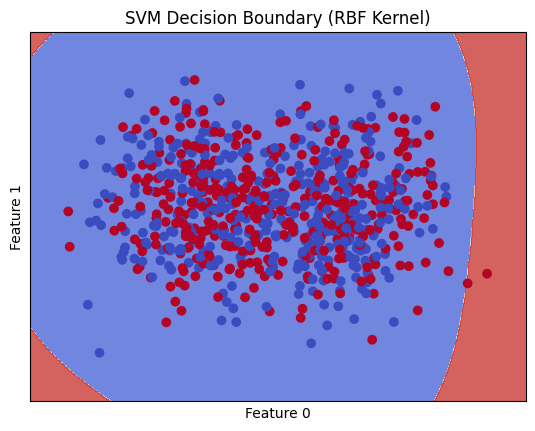

In [27]:
train_plot(X_train, y_train, model, 0, 1)